In [1]:
!pip install tensorflow==2.8.0 tensorflow-gpu==2.8.0 opencv-python sklearn matplotlib

In [2]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

In [3]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [4]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [5]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp.solutions.face_mesh.FACEMESH_TESSELATION)            #face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)            #pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)       #left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)      #right hand connections

In [6]:
def draw_styled_landmarks(image, results):
    #draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp.solutions.face_mesh.FACEMESH_TESSELATION,
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1))
    #draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2))
    #draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2))
    #draw right hand connection
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2))

In [7]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [8]:
draw_landmarks(frame, results)

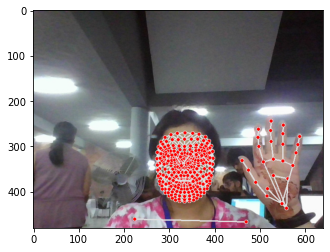

In [9]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [10]:
len(results.left_hand_landmarks.landmark)

21

In [11]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [12]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [13]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)

In [14]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [15]:
result_test = extract_keypoints(results)

In [16]:
result_test

array([ 0.51246524,  0.712879  , -0.80249137, ...,  0.        ,
        0.        ,  0.        ])

In [17]:
np.save('0', result_test)

In [18]:
np.load('0.npy')

array([ 0.51246524,  0.712879  , -0.80249137, ...,  0.        ,
        0.        ,  0.        ])

In [58]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('Data_f6') 

# Actions that we try to detect
actions = np.array(['hello','good','yes','five','thank you','c'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

# Folder start
# start_folder = 30

In [59]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

In [60]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
#                 print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [61]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [62]:
label_map = {label:num for num, label in enumerate(actions)}

In [63]:
label_map

{'hello': 0, 'good': 1, 'yes': 2, 'five': 3, 'thank you': 4, 'c': 5}

In [64]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [65]:
sequences

[[array([ 0.52331477,  0.72602767, -0.48318905, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.52104217,  0.70435238, -0.52642912, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.52027237,  0.69957268, -0.57076108, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.51852155,  0.69691688, -0.55585212, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.51782346,  0.69545656, -0.55154961, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.5173012 ,  0.69505918, -0.55710161, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.51742947,  0.69405526, -0.59109747, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.51754093,  0.69303209, -0.5805192 , ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.51676416,  0.692828  , -0.57173002, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.51679027,  0.6931771 , -0.62268192, ...,  0.        ,
       

In [66]:
np.array(sequences).shape

(180, 30, 1662)

In [67]:
np.array(labels).shape

(180,)

In [68]:
X = np.array(sequences)

In [69]:
X.shape

(180, 30, 1662)

In [70]:
y = to_categorical(labels).astype(int)

In [71]:
y

array([[1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1]])

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [73]:
y_test.shape

(9, 6)

In [74]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [75]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [76]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [77]:
res = [0.7, 0.2, 0.1,0.4,0.3,0.5]

In [78]:
actions[np.argmax(res)]

'hello'

In [79]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [80]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
6/6 [==============================] - 3s 77ms/step - loss: 19.6275 - categorical_accuracy: 0.2047
Epoch 2/2000
6/6 [==============================] - 0s 73ms/step - loss: 10.0008 - categorical_accuracy: 0.1813
Epoch 3/2000
6/6 [==============================] - 0s 79ms/step - loss: 33.4984 - categorical_accuracy: 0.1404
Epoch 4/2000
6/6 [==============================] - 0s 76ms/step - loss: 26.1743 - categorical_accuracy: 0.1111
Epoch 5/2000
6/6 [==============================] - 0s 77ms/step - loss: 60.9115 - categorical_accuracy: 0.0585
Epoch 6/2000
6/6 [==============================] - 0s 77ms/step - loss: 45.6289 - categorical_accuracy: 0.1988
Epoch 7/2000
6/6 [==============================] - 0s 79ms/step - loss: 33.2951 - categorical_accuracy: 0.1930
Epoch 8/2000
6/6 [==============================] - 0s 76ms/step - loss: 37.4625 - categorical_accuracy: 0.1813
Epoch 9/2000
6/6 [==============================] - 0s 79ms/step - loss: 17.4769 - categorical_accuracy:

6/6 [==============================] - 1s 99ms/step - loss: 1.7902 - categorical_accuracy: 0.1754
Epoch 74/2000
6/6 [==============================] - 1s 95ms/step - loss: 1.7902 - categorical_accuracy: 0.1754
Epoch 75/2000
6/6 [==============================] - 1s 118ms/step - loss: 1.7902 - categorical_accuracy: 0.1754
Epoch 76/2000
6/6 [==============================] - 1s 117ms/step - loss: 1.7901 - categorical_accuracy: 0.1754
Epoch 77/2000
6/6 [==============================] - 1s 116ms/step - loss: 1.7901 - categorical_accuracy: 0.1754
Epoch 78/2000
6/6 [==============================] - 1s 115ms/step - loss: 1.7901 - categorical_accuracy: 0.1754
Epoch 79/2000
6/6 [==============================] - 1s 120ms/step - loss: 1.7900 - categorical_accuracy: 0.1754
Epoch 80/2000
6/6 [==============================] - 1s 102ms/step - loss: 1.7900 - categorical_accuracy: 0.1754
Epoch 81/2000
6/6 [==============================] - 1s 97ms/step - loss: 1.7900 - categorical_accuracy: 0.1754


6/6 [==============================] - 1s 108ms/step - loss: 1.7774 - categorical_accuracy: 0.1754
Epoch 146/2000
6/6 [==============================] - 1s 108ms/step - loss: 1.7742 - categorical_accuracy: 0.1754
Epoch 147/2000
6/6 [==============================] - 1s 105ms/step - loss: 1.7712 - categorical_accuracy: 0.1871
Epoch 148/2000
6/6 [==============================] - 1s 108ms/step - loss: 1.7705 - categorical_accuracy: 0.1930
Epoch 149/2000
6/6 [==============================] - 1s 107ms/step - loss: 1.7620 - categorical_accuracy: 0.1930
Epoch 150/2000
6/6 [==============================] - 1s 149ms/step - loss: 1.7606 - categorical_accuracy: 0.1930
Epoch 151/2000
6/6 [==============================] - 1s 148ms/step - loss: 102.5758 - categorical_accuracy: 0.2105
Epoch 152/2000
6/6 [==============================] - 1s 134ms/step - loss: 1.7834 - categorical_accuracy: 0.1462
Epoch 153/2000
6/6 [==============================] - 1s 118ms/step - loss: 1.7681 - categorical_accu

Epoch 217/2000
6/6 [==============================] - 1s 140ms/step - loss: 1.4846 - categorical_accuracy: 0.2398
Epoch 218/2000
6/6 [==============================] - 1s 144ms/step - loss: 1.4420 - categorical_accuracy: 0.3509
Epoch 219/2000
6/6 [==============================] - 1s 127ms/step - loss: 1.4318 - categorical_accuracy: 0.3216
Epoch 220/2000
6/6 [==============================] - 1s 109ms/step - loss: 1.4222 - categorical_accuracy: 0.3333
Epoch 221/2000
6/6 [==============================] - 1s 111ms/step - loss: 1.4178 - categorical_accuracy: 0.3333
Epoch 222/2000
6/6 [==============================] - 1s 109ms/step - loss: 1.4134 - categorical_accuracy: 0.3333
Epoch 223/2000
6/6 [==============================] - 1s 112ms/step - loss: 1.4083 - categorical_accuracy: 0.3333
Epoch 224/2000
6/6 [==============================] - 1s 109ms/step - loss: 1.4037 - categorical_accuracy: 0.2982
Epoch 225/2000
6/6 [==============================] - 1s 113ms/step - loss: 1.3995 - cat

6/6 [==============================] - 1s 110ms/step - loss: 1.2741 - categorical_accuracy: 0.3333
Epoch 289/2000
6/6 [==============================] - 1s 111ms/step - loss: 1.2727 - categorical_accuracy: 0.3333
Epoch 290/2000
6/6 [==============================] - 1s 107ms/step - loss: 1.2716 - categorical_accuracy: 0.3333
Epoch 291/2000
6/6 [==============================] - 1s 115ms/step - loss: 1.2705 - categorical_accuracy: 0.3333
Epoch 292/2000
6/6 [==============================] - 1s 108ms/step - loss: 1.2695 - categorical_accuracy: 0.3333
Epoch 293/2000
6/6 [==============================] - 1s 107ms/step - loss: 1.2684 - categorical_accuracy: 0.3333
Epoch 294/2000
6/6 [==============================] - 1s 110ms/step - loss: 1.2671 - categorical_accuracy: 0.3333
Epoch 295/2000
6/6 [==============================] - 1s 110ms/step - loss: 1.2660 - categorical_accuracy: 0.3333
Epoch 296/2000
6/6 [==============================] - 1s 112ms/step - loss: 1.2651 - categorical_accura

6/6 [==============================] - 1s 104ms/step - loss: 1.2152 - categorical_accuracy: 0.3392
Epoch 361/2000
6/6 [==============================] - 1s 100ms/step - loss: 1.2147 - categorical_accuracy: 0.3216
Epoch 362/2000
6/6 [==============================] - 1s 102ms/step - loss: 1.2144 - categorical_accuracy: 0.3333
Epoch 363/2000
6/6 [==============================] - 1s 98ms/step - loss: 1.2139 - categorical_accuracy: 0.3333
Epoch 364/2000
6/6 [==============================] - 1s 103ms/step - loss: 1.2133 - categorical_accuracy: 0.3333
Epoch 365/2000
6/6 [==============================] - 1s 97ms/step - loss: 1.2128 - categorical_accuracy: 0.3333
Epoch 366/2000
6/6 [==============================] - 1s 102ms/step - loss: 1.2122 - categorical_accuracy: 0.3333
Epoch 367/2000
6/6 [==============================] - 1s 96ms/step - loss: 1.2126 - categorical_accuracy: 0.3333
Epoch 368/2000
6/6 [==============================] - 1s 93ms/step - loss: 1.2112 - categorical_accuracy: 

6/6 [==============================] - 1s 99ms/step - loss: 1.1828 - categorical_accuracy: 0.3392
Epoch 433/2000
6/6 [==============================] - 1s 94ms/step - loss: 1.1823 - categorical_accuracy: 0.3392
Epoch 434/2000
6/6 [==============================] - 1s 96ms/step - loss: 1.1819 - categorical_accuracy: 0.3392
Epoch 435/2000
6/6 [==============================] - 1s 100ms/step - loss: 1.1816 - categorical_accuracy: 0.3392
Epoch 436/2000
6/6 [==============================] - 1s 102ms/step - loss: 1.1814 - categorical_accuracy: 0.3392
Epoch 437/2000
6/6 [==============================] - 1s 98ms/step - loss: 1.1809 - categorical_accuracy: 0.3392
Epoch 438/2000
6/6 [==============================] - 1s 102ms/step - loss: 1.1807 - categorical_accuracy: 0.3392
Epoch 439/2000
6/6 [==============================] - 1s 97ms/step - loss: 1.1805 - categorical_accuracy: 0.3392
Epoch 440/2000
6/6 [==============================] - 1s 103ms/step - loss: 1.1801 - categorical_accuracy: 0

6/6 [==============================] - 1s 95ms/step - loss: 1.1614 - categorical_accuracy: 0.3392
Epoch 505/2000
6/6 [==============================] - 1s 100ms/step - loss: 1.1614 - categorical_accuracy: 0.3392
Epoch 506/2000
6/6 [==============================] - 1s 94ms/step - loss: 1.1611 - categorical_accuracy: 0.3392
Epoch 507/2000
6/6 [==============================] - 1s 98ms/step - loss: 1.1606 - categorical_accuracy: 0.3392
Epoch 508/2000
6/6 [==============================] - 1s 94ms/step - loss: 1.1604 - categorical_accuracy: 0.3392
Epoch 509/2000
6/6 [==============================] - 1s 98ms/step - loss: 1.1602 - categorical_accuracy: 0.3392
Epoch 510/2000
6/6 [==============================] - 1s 97ms/step - loss: 1.1599 - categorical_accuracy: 0.3275
Epoch 511/2000
6/6 [==============================] - 1s 100ms/step - loss: 1.1597 - categorical_accuracy: 0.3158
Epoch 512/2000
6/6 [==============================] - 1s 96ms/step - loss: 1.1595 - categorical_accuracy: 0.3

6/6 [==============================] - 1s 117ms/step - loss: 1.1442 - categorical_accuracy: 0.3509
Epoch 577/2000
6/6 [==============================] - 1s 120ms/step - loss: 1.1445 - categorical_accuracy: 0.3275
Epoch 578/2000
6/6 [==============================] - 1s 124ms/step - loss: 1.1440 - categorical_accuracy: 0.3333
Epoch 579/2000
6/6 [==============================] - 1s 125ms/step - loss: 1.1434 - categorical_accuracy: 0.3333
Epoch 580/2000
6/6 [==============================] - 1s 122ms/step - loss: 1.1431 - categorical_accuracy: 0.3333
Epoch 581/2000
6/6 [==============================] - 1s 122ms/step - loss: 1.1428 - categorical_accuracy: 0.3333
Epoch 582/2000
6/6 [==============================] - 1s 125ms/step - loss: 1.1421 - categorical_accuracy: 0.3333
Epoch 583/2000
6/6 [==============================] - 1s 121ms/step - loss: 1.1417 - categorical_accuracy: 0.3099
Epoch 584/2000
6/6 [==============================] - 1s 120ms/step - loss: 1.1413 - categorical_accura

Epoch 648/2000
6/6 [==============================] - 1s 120ms/step - loss: 1.0346 - categorical_accuracy: 0.4971
Epoch 649/2000
6/6 [==============================] - 1s 119ms/step - loss: 1.0323 - categorical_accuracy: 0.5029
Epoch 650/2000
6/6 [==============================] - 1s 112ms/step - loss: 1.0312 - categorical_accuracy: 0.5029
Epoch 651/2000
6/6 [==============================] - 1s 113ms/step - loss: 1.0305 - categorical_accuracy: 0.5263
Epoch 652/2000
6/6 [==============================] - 1s 111ms/step - loss: 1.0276 - categorical_accuracy: 0.4912
Epoch 653/2000
6/6 [==============================] - 1s 118ms/step - loss: 1.0253 - categorical_accuracy: 0.5029
Epoch 654/2000
6/6 [==============================] - 1s 109ms/step - loss: 1.0225 - categorical_accuracy: 0.4912
Epoch 655/2000
6/6 [==============================] - 1s 113ms/step - loss: 1.0211 - categorical_accuracy: 0.5205
Epoch 656/2000
6/6 [==============================] - 1s 112ms/step - loss: 1.0191 - cat

6/6 [==============================] - 1s 110ms/step - loss: 1.2835 - categorical_accuracy: 0.3392
Epoch 720/2000
6/6 [==============================] - 1s 107ms/step - loss: 1.2569 - categorical_accuracy: 0.3392
Epoch 721/2000
6/6 [==============================] - 1s 111ms/step - loss: 1.2382 - categorical_accuracy: 0.3392
Epoch 722/2000
6/6 [==============================] - 1s 110ms/step - loss: 1.2252 - categorical_accuracy: 0.3392
Epoch 723/2000
6/6 [==============================] - 1s 111ms/step - loss: 1.2126 - categorical_accuracy: 0.3392
Epoch 724/2000
6/6 [==============================] - 1s 110ms/step - loss: 1.2016 - categorical_accuracy: 0.3392
Epoch 725/2000
6/6 [==============================] - 1s 120ms/step - loss: 1.1920 - categorical_accuracy: 0.3392
Epoch 726/2000
6/6 [==============================] - 1s 124ms/step - loss: 1.1869 - categorical_accuracy: 0.3392
Epoch 727/2000
6/6 [==============================] - 1s 128ms/step - loss: 1.1808 - categorical_accura

6/6 [==============================] - 1s 98ms/step - loss: 1.7859 - categorical_accuracy: 0.1988
Epoch 792/2000
6/6 [==============================] - 1s 98ms/step - loss: 1.7856 - categorical_accuracy: 0.1696
Epoch 793/2000
6/6 [==============================] - 1s 102ms/step - loss: 1.7855 - categorical_accuracy: 0.1930
Epoch 794/2000
6/6 [==============================] - 1s 100ms/step - loss: 1.7851 - categorical_accuracy: 0.3450
Epoch 795/2000
6/6 [==============================] - 1s 97ms/step - loss: 1.7850 - categorical_accuracy: 0.2749
Epoch 796/2000
6/6 [==============================] - 1s 105ms/step - loss: 1.7847 - categorical_accuracy: 0.1754
Epoch 797/2000
6/6 [==============================] - 1s 101ms/step - loss: 1.7846 - categorical_accuracy: 0.1754
Epoch 798/2000
6/6 [==============================] - 1s 106ms/step - loss: 1.7848 - categorical_accuracy: 0.1754
Epoch 799/2000
6/6 [==============================] - 1s 100ms/step - loss: 1.7847 - categorical_accuracy:

6/6 [==============================] - 1s 104ms/step - loss: 1.7739 - categorical_accuracy: 0.2807
Epoch 864/2000
6/6 [==============================] - 1s 98ms/step - loss: 1.7745 - categorical_accuracy: 0.3333
Epoch 865/2000
6/6 [==============================] - 1s 103ms/step - loss: 1.7753 - categorical_accuracy: 0.1696
Epoch 866/2000
6/6 [==============================] - 1s 101ms/step - loss: 1.7752 - categorical_accuracy: 0.1696
Epoch 867/2000
6/6 [==============================] - 1s 105ms/step - loss: 1.7740 - categorical_accuracy: 0.2632
Epoch 868/2000
6/6 [==============================] - 1s 102ms/step - loss: 1.7738 - categorical_accuracy: 0.2982
Epoch 869/2000
6/6 [==============================] - 1s 105ms/step - loss: 1.7730 - categorical_accuracy: 0.3450
Epoch 870/2000
6/6 [==============================] - 1s 102ms/step - loss: 1.7736 - categorical_accuracy: 0.3450
Epoch 871/2000
6/6 [==============================] - 1s 105ms/step - loss: 1.7726 - categorical_accurac

6/6 [==============================] - 1s 97ms/step - loss: 1.7449 - categorical_accuracy: 0.3626
Epoch 936/2000
6/6 [==============================] - 1s 101ms/step - loss: 1.7441 - categorical_accuracy: 0.3392
Epoch 937/2000
6/6 [==============================] - 1s 97ms/step - loss: 1.7437 - categorical_accuracy: 0.3392
Epoch 938/2000
6/6 [==============================] - 1s 105ms/step - loss: 1.7430 - categorical_accuracy: 0.3392
Epoch 939/2000
6/6 [==============================] - 1s 96ms/step - loss: 1.7424 - categorical_accuracy: 0.3158
Epoch 940/2000
6/6 [==============================] - 1s 106ms/step - loss: 1.7427 - categorical_accuracy: 0.3567
Epoch 941/2000
6/6 [==============================] - 1s 103ms/step - loss: 1.7410 - categorical_accuracy: 0.3333
Epoch 942/2000
6/6 [==============================] - 1s 104ms/step - loss: 1.7412 - categorical_accuracy: 0.3392
Epoch 943/2000
6/6 [==============================] - 1s 100ms/step - loss: 1.7393 - categorical_accuracy:

6/6 [==============================] - 1s 99ms/step - loss: 1.6600 - categorical_accuracy: 0.3567
Epoch 1008/2000
6/6 [==============================] - 1s 100ms/step - loss: 1.6571 - categorical_accuracy: 0.3392
Epoch 1009/2000
6/6 [==============================] - 1s 96ms/step - loss: 1.6543 - categorical_accuracy: 0.3392
Epoch 1010/2000
6/6 [==============================] - 1s 100ms/step - loss: 1.6522 - categorical_accuracy: 0.3392
Epoch 1011/2000
6/6 [==============================] - 1s 95ms/step - loss: 1.6504 - categorical_accuracy: 0.3392
Epoch 1012/2000
6/6 [==============================] - 1s 96ms/step - loss: 1.6500 - categorical_accuracy: 0.3392
Epoch 1013/2000
6/6 [==============================] - 1s 98ms/step - loss: 1.6477 - categorical_accuracy: 0.3392
Epoch 1014/2000
6/6 [==============================] - 1s 100ms/step - loss: 1.6445 - categorical_accuracy: 0.3392
Epoch 1015/2000
6/6 [==============================] - 1s 94ms/step - loss: 1.6418 - categorical_accu

6/6 [==============================] - 1s 96ms/step - loss: 1.4157 - categorical_accuracy: 0.3450
Epoch 1079/2000
6/6 [==============================] - 1s 101ms/step - loss: 1.4100 - categorical_accuracy: 0.3450
Epoch 1080/2000
6/6 [==============================] - 1s 97ms/step - loss: 1.4054 - categorical_accuracy: 0.3450
Epoch 1081/2000
6/6 [==============================] - 1s 101ms/step - loss: 1.4017 - categorical_accuracy: 0.3860
Epoch 1082/2000
6/6 [==============================] - 1s 101ms/step - loss: 1.3955 - categorical_accuracy: 0.3333
Epoch 1083/2000
6/6 [==============================] - 1s 107ms/step - loss: 1.3928 - categorical_accuracy: 0.3333
Epoch 1084/2000
6/6 [==============================] - 1s 101ms/step - loss: 1.3874 - categorical_accuracy: 0.3333
Epoch 1085/2000
6/6 [==============================] - 1s 97ms/step - loss: 1.3835 - categorical_accuracy: 0.3333
Epoch 1086/2000
6/6 [==============================] - 1s 100ms/step - loss: 1.3784 - categorical_a

6/6 [==============================] - 1s 101ms/step - loss: 1.1893 - categorical_accuracy: 0.4912
Epoch 1150/2000
6/6 [==============================] - 1s 97ms/step - loss: 1.1874 - categorical_accuracy: 0.4854
Epoch 1151/2000
6/6 [==============================] - 1s 101ms/step - loss: 1.1860 - categorical_accuracy: 0.4971
Epoch 1152/2000
6/6 [==============================] - 1s 95ms/step - loss: 1.1842 - categorical_accuracy: 0.4912
Epoch 1153/2000
6/6 [==============================] - 1s 99ms/step - loss: 1.1830 - categorical_accuracy: 0.4620
Epoch 1154/2000
6/6 [==============================] - 1s 97ms/step - loss: 1.1816 - categorical_accuracy: 0.4737
Epoch 1155/2000
6/6 [==============================] - 1s 100ms/step - loss: 1.1796 - categorical_accuracy: 0.4971
Epoch 1156/2000
6/6 [==============================] - 1s 97ms/step - loss: 1.1787 - categorical_accuracy: 0.6316
Epoch 1157/2000
6/6 [==============================] - 1s 101ms/step - loss: 1.1786 - categorical_acc

6/6 [==============================] - 1s 97ms/step - loss: 1.1024 - categorical_accuracy: 0.6667
Epoch 1221/2000
6/6 [==============================] - 1s 101ms/step - loss: 1.1029 - categorical_accuracy: 0.6550
Epoch 1222/2000
6/6 [==============================] - 1s 95ms/step - loss: 1.0992 - categorical_accuracy: 0.7076
Epoch 1223/2000
6/6 [==============================] - 1s 99ms/step - loss: 1.0991 - categorical_accuracy: 0.5673
Epoch 1224/2000
6/6 [==============================] - 1s 96ms/step - loss: 1.0972 - categorical_accuracy: 0.5029
Epoch 1225/2000
6/6 [==============================] - 1s 100ms/step - loss: 1.0968 - categorical_accuracy: 0.4912
Epoch 1226/2000
6/6 [==============================] - 1s 98ms/step - loss: 1.0948 - categorical_accuracy: 0.4971
Epoch 1227/2000
6/6 [==============================] - 1s 101ms/step - loss: 1.0946 - categorical_accuracy: 0.5029
Epoch 1228/2000
6/6 [==============================] - 1s 96ms/step - loss: 1.0938 - categorical_accu

6/6 [==============================] - 1s 91ms/step - loss: 1.0239 - categorical_accuracy: 0.5029
Epoch 1292/2000
6/6 [==============================] - 1s 91ms/step - loss: 1.0226 - categorical_accuracy: 0.4854
Epoch 1293/2000
6/6 [==============================] - 1s 92ms/step - loss: 1.0218 - categorical_accuracy: 0.4912
Epoch 1294/2000
6/6 [==============================] - 1s 94ms/step - loss: 1.0207 - categorical_accuracy: 0.5263
Epoch 1295/2000
6/6 [==============================] - 1s 91ms/step - loss: 1.0194 - categorical_accuracy: 0.5906
Epoch 1296/2000
6/6 [==============================] - 1s 91ms/step - loss: 1.0210 - categorical_accuracy: 0.5497
Epoch 1297/2000
6/6 [==============================] - 1s 91ms/step - loss: 1.0175 - categorical_accuracy: 0.5497
Epoch 1298/2000
6/6 [==============================] - 1s 93ms/step - loss: 1.0169 - categorical_accuracy: 0.6257
Epoch 1299/2000
6/6 [==============================] - 1s 91ms/step - loss: 1.0155 - categorical_accurac

Epoch 1363/2000
6/6 [==============================] - 1s 91ms/step - loss: 0.9627 - categorical_accuracy: 0.6199
Epoch 1364/2000
6/6 [==============================] - 1s 95ms/step - loss: 0.9601 - categorical_accuracy: 0.6608
Epoch 1365/2000
6/6 [==============================] - 1s 91ms/step - loss: 0.9614 - categorical_accuracy: 0.7310
Epoch 1366/2000
6/6 [==============================] - 1s 89ms/step - loss: 0.9583 - categorical_accuracy: 0.7310
Epoch 1367/2000
6/6 [==============================] - 1s 93ms/step - loss: 0.9583 - categorical_accuracy: 0.6842
Epoch 1368/2000
6/6 [==============================] - 1s 94ms/step - loss: 0.9566 - categorical_accuracy: 0.8012
Epoch 1369/2000
6/6 [==============================] - 1s 130ms/step - loss: 0.9556 - categorical_accuracy: 0.7836
Epoch 1370/2000
6/6 [==============================] - 1s 112ms/step - loss: 0.9557 - categorical_accuracy: 0.7719
Epoch 1371/2000
6/6 [==============================] - 1s 103ms/step - loss: 0.9551 - 

6/6 [==============================] - 1s 103ms/step - loss: 0.9252 - categorical_accuracy: 0.7018
Epoch 1435/2000
6/6 [==============================] - 1s 101ms/step - loss: 0.9240 - categorical_accuracy: 0.7427
Epoch 1436/2000
6/6 [==============================] - 1s 92ms/step - loss: 0.9233 - categorical_accuracy: 0.7427
Epoch 1437/2000
6/6 [==============================] - 1s 92ms/step - loss: 0.9248 - categorical_accuracy: 0.7602
Epoch 1438/2000
6/6 [==============================] - 1s 94ms/step - loss: 0.9256 - categorical_accuracy: 0.7193
Epoch 1439/2000
6/6 [==============================] - 1s 99ms/step - loss: 0.9263 - categorical_accuracy: 0.7485
Epoch 1440/2000
6/6 [==============================] - 1s 93ms/step - loss: 0.9229 - categorical_accuracy: 0.7778
Epoch 1441/2000
6/6 [==============================] - 1s 95ms/step - loss: 0.9212 - categorical_accuracy: 0.7719
Epoch 1442/2000
6/6 [==============================] - 1s 92ms/step - loss: 0.9221 - categorical_accur

Epoch 1506/2000
6/6 [==============================] - 1s 90ms/step - loss: 0.9036 - categorical_accuracy: 0.7368
Epoch 1507/2000
6/6 [==============================] - 1s 91ms/step - loss: 0.9046 - categorical_accuracy: 0.7895
Epoch 1508/2000
6/6 [==============================] - 1s 91ms/step - loss: 0.9020 - categorical_accuracy: 0.7544
Epoch 1509/2000
6/6 [==============================] - 1s 94ms/step - loss: 0.9049 - categorical_accuracy: 0.6491
Epoch 1510/2000
6/6 [==============================] - 1s 91ms/step - loss: 0.9027 - categorical_accuracy: 0.6901
Epoch 1511/2000
6/6 [==============================] - 1s 95ms/step - loss: 0.9034 - categorical_accuracy: 0.6608
Epoch 1512/2000
6/6 [==============================] - 1s 90ms/step - loss: 0.9020 - categorical_accuracy: 0.6842
Epoch 1513/2000
6/6 [==============================] - 1s 93ms/step - loss: 0.9052 - categorical_accuracy: 0.7251
Epoch 1514/2000
6/6 [==============================] - 1s 94ms/step - loss: 0.8997 - cat

6/6 [==============================] - 1s 97ms/step - loss: 0.8890 - categorical_accuracy: 0.7719
Epoch 1578/2000
6/6 [==============================] - 1s 91ms/step - loss: 0.8922 - categorical_accuracy: 0.7661
Epoch 1579/2000
6/6 [==============================] - 1s 95ms/step - loss: 0.8914 - categorical_accuracy: 0.6901
Epoch 1580/2000
6/6 [==============================] - 1s 91ms/step - loss: 0.8892 - categorical_accuracy: 0.7310
Epoch 1581/2000
6/6 [==============================] - 1s 92ms/step - loss: 0.8930 - categorical_accuracy: 0.7836
Epoch 1582/2000
6/6 [==============================] - 1s 92ms/step - loss: 0.8857 - categorical_accuracy: 0.7719
Epoch 1583/2000
6/6 [==============================] - 1s 94ms/step - loss: 0.8855 - categorical_accuracy: 0.7719
Epoch 1584/2000
6/6 [==============================] - 1s 92ms/step - loss: 0.8845 - categorical_accuracy: 0.8129
Epoch 1585/2000
6/6 [==============================] - 1s 95ms/step - loss: 0.8832 - categorical_accurac

Epoch 1649/2000
6/6 [==============================] - 1s 92ms/step - loss: 0.8528 - categorical_accuracy: 0.8129
Epoch 1650/2000
6/6 [==============================] - 1s 92ms/step - loss: 0.8545 - categorical_accuracy: 0.8246
Epoch 1651/2000
6/6 [==============================] - 1s 94ms/step - loss: 0.8467 - categorical_accuracy: 0.8246
Epoch 1652/2000
6/6 [==============================] - 1s 92ms/step - loss: 0.8508 - categorical_accuracy: 0.7661
Epoch 1653/2000
6/6 [==============================] - 1s 97ms/step - loss: 0.8504 - categorical_accuracy: 0.7251
Epoch 1654/2000
6/6 [==============================] - 1s 91ms/step - loss: 0.8480 - categorical_accuracy: 0.8187
Epoch 1655/2000
6/6 [==============================] - 1s 91ms/step - loss: 0.8459 - categorical_accuracy: 0.8070
Epoch 1656/2000
6/6 [==============================] - 1s 90ms/step - loss: 0.8453 - categorical_accuracy: 0.7602
Epoch 1657/2000
6/6 [==============================] - 1s 95ms/step - loss: 0.8531 - cat

6/6 [==============================] - 1s 92ms/step - loss: 0.7701 - categorical_accuracy: 0.8187
Epoch 1721/2000
6/6 [==============================] - 1s 92ms/step - loss: 0.7909 - categorical_accuracy: 0.6959
Epoch 1722/2000
6/6 [==============================] - 1s 92ms/step - loss: 0.8002 - categorical_accuracy: 0.7661
Epoch 1723/2000
6/6 [==============================] - 1s 94ms/step - loss: 0.7887 - categorical_accuracy: 0.7251
Epoch 1724/2000
6/6 [==============================] - 1s 92ms/step - loss: 0.7779 - categorical_accuracy: 0.8070
Epoch 1725/2000
6/6 [==============================] - 1s 94ms/step - loss: 0.7667 - categorical_accuracy: 0.8421
Epoch 1726/2000
6/6 [==============================] - 1s 91ms/step - loss: 0.7697 - categorical_accuracy: 0.8538
Epoch 1727/2000
6/6 [==============================] - 1s 96ms/step - loss: 0.7725 - categorical_accuracy: 0.8538
Epoch 1728/2000
6/6 [==============================] - 1s 91ms/step - loss: 0.7672 - categorical_accurac

6/6 [==============================] - 1s 91ms/step - loss: 0.7240 - categorical_accuracy: 0.7895
Epoch 1793/2000
6/6 [==============================] - 1s 96ms/step - loss: 0.7222 - categorical_accuracy: 0.8129
Epoch 1794/2000
6/6 [==============================] - 1s 93ms/step - loss: 0.7294 - categorical_accuracy: 0.8421
Epoch 1795/2000
6/6 [==============================] - 1s 95ms/step - loss: 0.7226 - categorical_accuracy: 0.7719
Epoch 1796/2000
6/6 [==============================] - 1s 92ms/step - loss: 0.7241 - categorical_accuracy: 0.8596
Epoch 1797/2000
6/6 [==============================] - 1s 94ms/step - loss: 0.7164 - categorical_accuracy: 0.8363
Epoch 1798/2000
6/6 [==============================] - 1s 91ms/step - loss: 0.7252 - categorical_accuracy: 0.8070
Epoch 1799/2000
6/6 [==============================] - 1s 91ms/step - loss: 0.7225 - categorical_accuracy: 0.8421
Epoch 1800/2000
6/6 [==============================] - 1s 92ms/step - loss: 0.7210 - categorical_accurac

6/6 [==============================] - 1s 92ms/step - loss: 0.6879 - categorical_accuracy: 0.8187
Epoch 1865/2000
6/6 [==============================] - 1s 96ms/step - loss: 0.6942 - categorical_accuracy: 0.8129
Epoch 1866/2000
6/6 [==============================] - 1s 91ms/step - loss: 0.6867 - categorical_accuracy: 0.8480
Epoch 1867/2000
6/6 [==============================] - 1s 96ms/step - loss: 0.6837 - categorical_accuracy: 0.8070
Epoch 1868/2000
6/6 [==============================] - 1s 90ms/step - loss: 0.7090 - categorical_accuracy: 0.7836
Epoch 1869/2000
6/6 [==============================] - 1s 91ms/step - loss: 0.6961 - categorical_accuracy: 0.8187
Epoch 1870/2000
6/6 [==============================] - 1s 92ms/step - loss: 0.6981 - categorical_accuracy: 0.8421
Epoch 1871/2000
6/6 [==============================] - 1s 94ms/step - loss: 0.6897 - categorical_accuracy: 0.7953
Epoch 1872/2000
6/6 [==============================] - 1s 89ms/step - loss: 0.6824 - categorical_accurac

Epoch 1936/2000
6/6 [==============================] - 1s 89ms/step - loss: 0.6763 - categorical_accuracy: 0.8304
Epoch 1937/2000
6/6 [==============================] - 1s 93ms/step - loss: 0.6866 - categorical_accuracy: 0.7602
Epoch 1938/2000
6/6 [==============================] - 1s 97ms/step - loss: 0.6562 - categorical_accuracy: 0.8421
Epoch 1939/2000
6/6 [==============================] - 1s 89ms/step - loss: 0.7058 - categorical_accuracy: 0.8129
Epoch 1940/2000
6/6 [==============================] - 1s 92ms/step - loss: 0.6555 - categorical_accuracy: 0.8363
Epoch 1941/2000
6/6 [==============================] - 1s 90ms/step - loss: 0.6704 - categorical_accuracy: 0.8363
Epoch 1942/2000
6/6 [==============================] - 1s 97ms/step - loss: 0.6563 - categorical_accuracy: 0.8421
Epoch 1943/2000
6/6 [==============================] - 1s 91ms/step - loss: 0.6528 - categorical_accuracy: 0.8421
Epoch 1944/2000
6/6 [==============================] - 1s 95ms/step - loss: 0.6483 - cat

In [81]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 30, 64)            442112    
                                                                 
 lstm_4 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_5 (LSTM)               (None, 64)                49408     
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 6)                 198       
                                                                 
Total params: 596,774
Trainable params: 596,774
Non-tr

In [82]:
res = model.predict(X_test)

In [84]:
actions[np.argmax(res[0])]

'thank you'

In [85]:
actions[np.argmax(y_test[0])]

'thank you'

In [86]:
model.save('action_f6.h5')

In [87]:
model.load_weights('action_f6.h5')

In [88]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [89]:
yhat = model.predict(X_test)

In [90]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [91]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[8, 0],
        [0, 1]],

       [[7, 0],
        [0, 2]],

       [[4, 0],
        [0, 5]],

       [[8, 0],
        [0, 1]]], dtype=int64)

In [92]:
accuracy_score(ytrue, yhat)

1.0

In [94]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.1

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
       # draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
#         sequence.insert(0,keypoints)
#         sequence = sequence[:30]
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            if np.unique(predictions[-10:])[0]==np.argmax(res):
                
            
            #3. Viz logic
                if res[np.argmax(res)] > threshold: 
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

        # Viz probabilities
            #image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
thank you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thank you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thank you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thank you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thank you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thank you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thank you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thank you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thank you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thank you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thank you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thank you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thank you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thank you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thank

<class 'mediapipe.python.solution_base.SolutionOutputs'>
yes
<class 'mediapipe.python.solution_base.SolutionOutputs'>
yes
<class 'mediapipe.python.solution_base.SolutionOutputs'>
yes
<class 'mediapipe.python.solution_base.SolutionOutputs'>
yes
<class 'mediapipe.python.solution_base.SolutionOutputs'>
yes
<class 'mediapipe.python.solution_base.SolutionOutputs'>
yes
<class 'mediapipe.python.solution_base.SolutionOutputs'>
yes
<class 'mediapipe.python.solution_base.SolutionOutputs'>
yes
<class 'mediapipe.python.solution_base.SolutionOutputs'>
yes
<class 'mediapipe.python.solution_base.SolutionOutputs'>
yes
<class 'mediapipe.python.solution_base.SolutionOutputs'>
five
<class 'mediapipe.python.solution_base.SolutionOutputs'>
five
<class 'mediapipe.python.solution_base.SolutionOutputs'>
five
<class 'mediapipe.python.solution_base.SolutionOutputs'>
five
<class 'mediapipe.python.solution_base.SolutionOutputs'>
five
<class 'mediapipe.python.solution_base.SolutionOutputs'>
five
<class 'mediapipe.

<class 'mediapipe.python.solution_base.SolutionOutputs'>
five
<class 'mediapipe.python.solution_base.SolutionOutputs'>
five


In [95]:
cap.release()
cv2.destroyAllWindows()

In [96]:
res[np.argmax(res)] > threshold

True

In [97]:
model.predict(np.expand_dims(X_test[0], axis=0))

array([[5.8502275e-03, 1.7463331e-12, 1.5566832e-01, 2.5982765e-02,
        8.1247699e-01, 2.1682637e-05]], dtype=float32)

In [98]:
# model=pickle.load(open('model.pkl','rb'))
model.save("model_f6")

INFO:tensorflow:Assets written to: model_f6\assets


In [99]:
sequence = []
sentence = []
predictions = []
threshold = 0.1

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        #draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
#         sequence.insert(0,keypoints)
#         sequence = sequence[:30]
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            if np.unique(predictions[-10:])[0]==np.argmax(res):
                
            
            #3. Viz logic
                if res[np.argmax(res)] > threshold: 
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

        # Viz probabilities
            #image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
thank you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thank you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thank you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thank you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
yes
<class 'mediapipe.python.solution_base.SolutionOutputs'>
yes
<class 'mediapipe.python.solution_base.SolutionOutputs'>
yes
<class 'mediapipe.python.solution_base.SolutionOutputs'>
yes
<class 'mediapipe.python.solution_base.SolutionOutputs'>
yes
<class 'mediapipe.python.solution_base.SolutionOutputs'>
yes
<class 'mediapipe.python.solution_base.SolutionOutputs'>
yes
<class 'mediapipe.python.solution_base.SolutionOutputs'>
yes
<class 'mediapipe.python.solution_base.SolutionOutputs'>
yes
<class 'mediapipe.python.solution_base.SolutionOutputs'>
yes
<class 'mediapipe.python.solution_base.SolutionOutputs'>
yes
<class 'mediapipe.python.solution_base.SolutionOutputs'>
yes


<class 'mediapipe.python.solution_base.SolutionOutputs'>
thank you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thank you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thank you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thank you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thank you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thank you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thank you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thank you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thank you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thank you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thank you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thank you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thank you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thank you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thank

<class 'mediapipe.python.solution_base.SolutionOutputs'>
thank you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thank you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thank you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thank you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thank you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thank you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thank you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thank you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thank you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thank you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thank you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
yes
<class 'mediapipe.python.solution_base.SolutionOutputs'>
yes
<class 'mediapipe.python.solution_base.SolutionOutputs'>
yes
<class 'mediapipe.python.solution_base.SolutionOutputs'>
yes
<class 'mediapipe.p

<class 'mediapipe.python.solution_base.SolutionOutputs'>
yes
<class 'mediapipe.python.solution_base.SolutionOutputs'>
yes
<class 'mediapipe.python.solution_base.SolutionOutputs'>
yes
<class 'mediapipe.python.solution_base.SolutionOutputs'>
yes
<class 'mediapipe.python.solution_base.SolutionOutputs'>
yes
<class 'mediapipe.python.solution_base.SolutionOutputs'>
yes
<class 'mediapipe.python.solution_base.SolutionOutputs'>
yes
<class 'mediapipe.python.solution_base.SolutionOutputs'>
yes
<class 'mediapipe.python.solution_base.SolutionOutputs'>
yes
<class 'mediapipe.python.solution_base.SolutionOutputs'>
yes
<class 'mediapipe.python.solution_base.SolutionOutputs'>
yes
<class 'mediapipe.python.solution_base.SolutionOutputs'>
yes
<class 'mediapipe.python.solution_base.SolutionOutputs'>
five
<class 'mediapipe.python.solution_base.SolutionOutputs'>
five
<class 'mediapipe.python.solution_base.SolutionOutputs'>
five
<class 'mediapipe.python.solution_base.SolutionOutputs'>
yes
<class 'mediapipe.pyt

<class 'mediapipe.python.solution_base.SolutionOutputs'>
five
<class 'mediapipe.python.solution_base.SolutionOutputs'>
five
<class 'mediapipe.python.solution_base.SolutionOutputs'>
five
<class 'mediapipe.python.solution_base.SolutionOutputs'>
five
<class 'mediapipe.python.solution_base.SolutionOutputs'>
five
<class 'mediapipe.python.solution_base.SolutionOutputs'>
five
<class 'mediapipe.python.solution_base.SolutionOutputs'>
five
<class 'mediapipe.python.solution_base.SolutionOutputs'>
five
<class 'mediapipe.python.solution_base.SolutionOutputs'>
five
<class 'mediapipe.python.solution_base.SolutionOutputs'>
five
<class 'mediapipe.python.solution_base.SolutionOutputs'>
five
<class 'mediapipe.python.solution_base.SolutionOutputs'>
five
<class 'mediapipe.python.solution_base.SolutionOutputs'>
five
<class 'mediapipe.python.solution_base.SolutionOutputs'>
five
<class 'mediapipe.python.solution_base.SolutionOutputs'>
five
<class 'mediapipe.python.solution_base.SolutionOutputs'>
five
<class '

<class 'mediapipe.python.solution_base.SolutionOutputs'>
five
<class 'mediapipe.python.solution_base.SolutionOutputs'>
yes
<class 'mediapipe.python.solution_base.SolutionOutputs'>
yes
<class 'mediapipe.python.solution_base.SolutionOutputs'>
yes
<class 'mediapipe.python.solution_base.SolutionOutputs'>
five
<class 'mediapipe.python.solution_base.SolutionOutputs'>
yes
<class 'mediapipe.python.solution_base.SolutionOutputs'>
yes
<class 'mediapipe.python.solution_base.SolutionOutputs'>
yes
<class 'mediapipe.python.solution_base.SolutionOutputs'>
yes
<class 'mediapipe.python.solution_base.SolutionOutputs'>
yes
<class 'mediapipe.python.solution_base.SolutionOutputs'>
yes
<class 'mediapipe.python.solution_base.SolutionOutputs'>
yes
<class 'mediapipe.python.solution_base.SolutionOutputs'>
yes
<class 'mediapipe.python.solution_base.SolutionOutputs'>
yes
<class 'mediapipe.python.solution_base.SolutionOutputs'>
yes
<class 'mediapipe.python.solution_base.SolutionOutputs'>
yes
<class 'mediapipe.pyth

<class 'mediapipe.python.solution_base.SolutionOutputs'>
five
<class 'mediapipe.python.solution_base.SolutionOutputs'>
five
<class 'mediapipe.python.solution_base.SolutionOutputs'>
five
<class 'mediapipe.python.solution_base.SolutionOutputs'>
five
<class 'mediapipe.python.solution_base.SolutionOutputs'>
five
<class 'mediapipe.python.solution_base.SolutionOutputs'>
five
<class 'mediapipe.python.solution_base.SolutionOutputs'>
five
<class 'mediapipe.python.solution_base.SolutionOutputs'>
five
<class 'mediapipe.python.solution_base.SolutionOutputs'>
c
<class 'mediapipe.python.solution_base.SolutionOutputs'>
c
<class 'mediapipe.python.solution_base.SolutionOutputs'>
c
<class 'mediapipe.python.solution_base.SolutionOutputs'>
c
<class 'mediapipe.python.solution_base.SolutionOutputs'>
c
<class 'mediapipe.python.solution_base.SolutionOutputs'>
c
<class 'mediapipe.python.solution_base.SolutionOutputs'>
c
<class 'mediapipe.python.solution_base.SolutionOutputs'>
c
<class 'mediapipe.python.solutio

In [100]:
model.save('model_f6_final')

INFO:tensorflow:Assets written to: model_f6_final\assets


INFO:tensorflow:Assets written to: model_f6_final\assets
